In [1]:
import sys, glob
import cv2
import torch

sys.path.insert(1, './functions')

import data_preprocessing
import data_visualisation
import pytorch_models
from data_preprocessing import load_single_image
from data_visualisation import plot_single_prediction, plot_refined_single_prediction
from pytorch_models import hed_cnn, pretrained_weights, hed_predict_single

In [2]:
weightsPath = './models/vgg16_4.pt'
hedModel = hed_cnn()
hedModel = pretrained_weights(hedModel, weightsPath=weightsPath, applyWeights=True, hedIn=True)

In [5]:
imSize = (320,480) # specify the target image size (height, width)
imDir = './testing/frames/oakisland_west-2023-12-17-122124Z/*.jpg'
imgPaths = [_ for _ in glob.glob(imDir)]

adaptive_thres_value: 0.9083507657051086


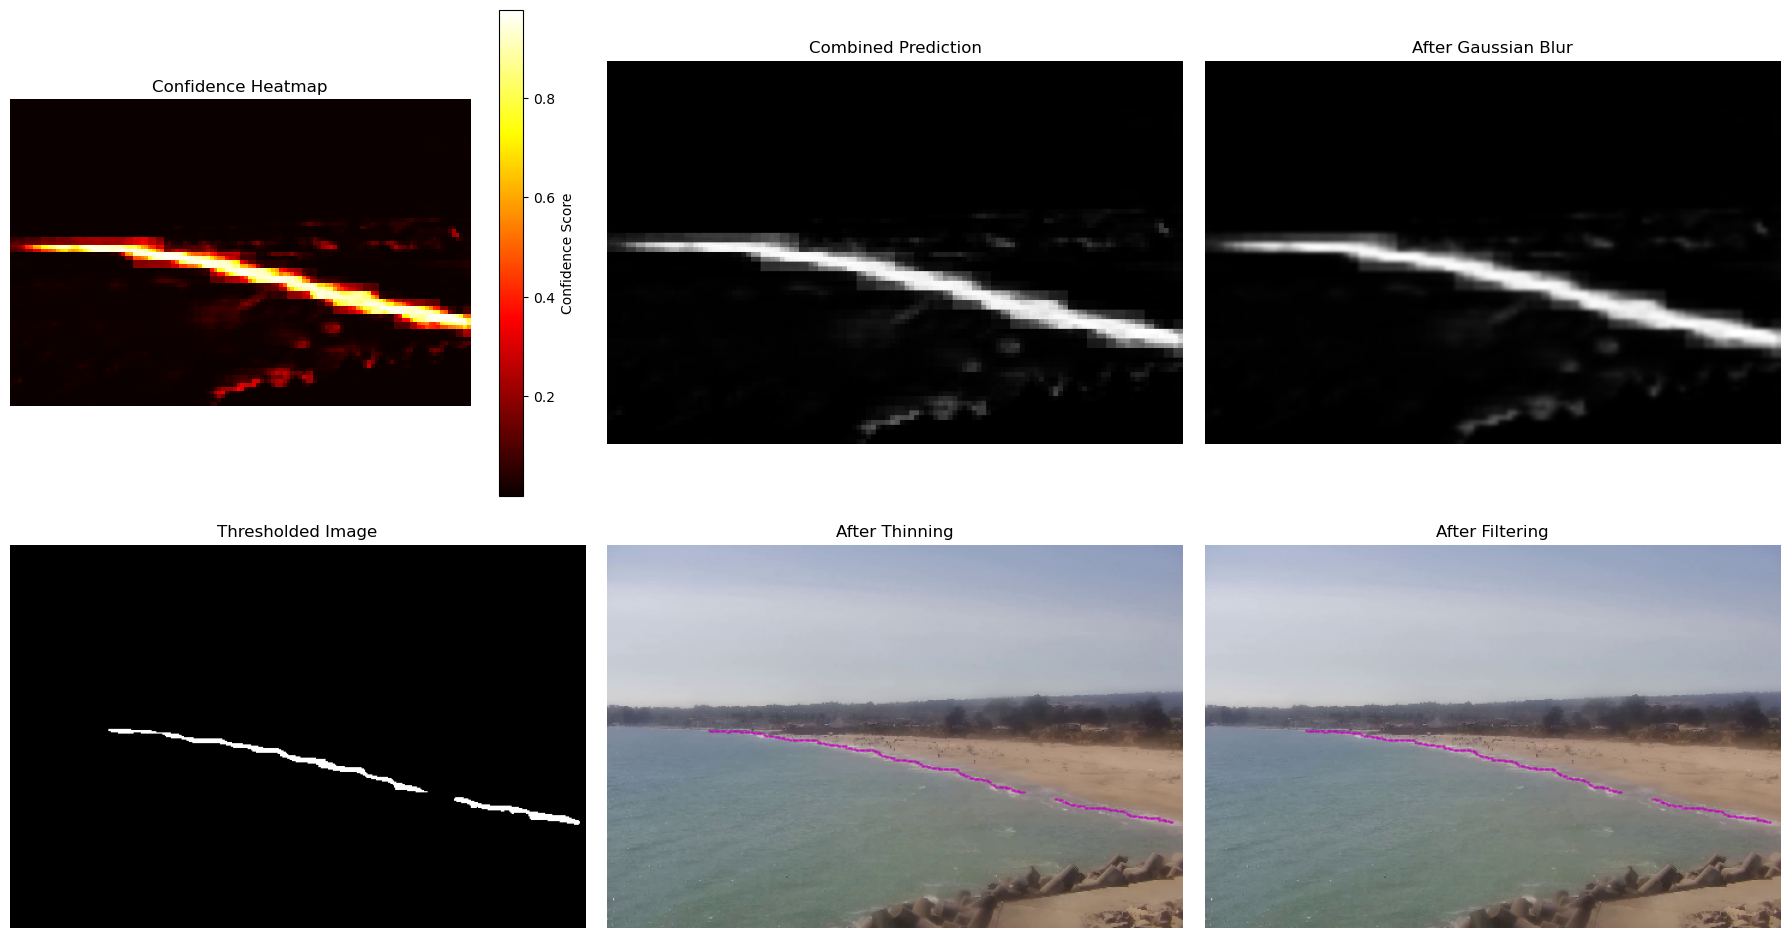

adaptive_thres_value: 0.8632514476776123


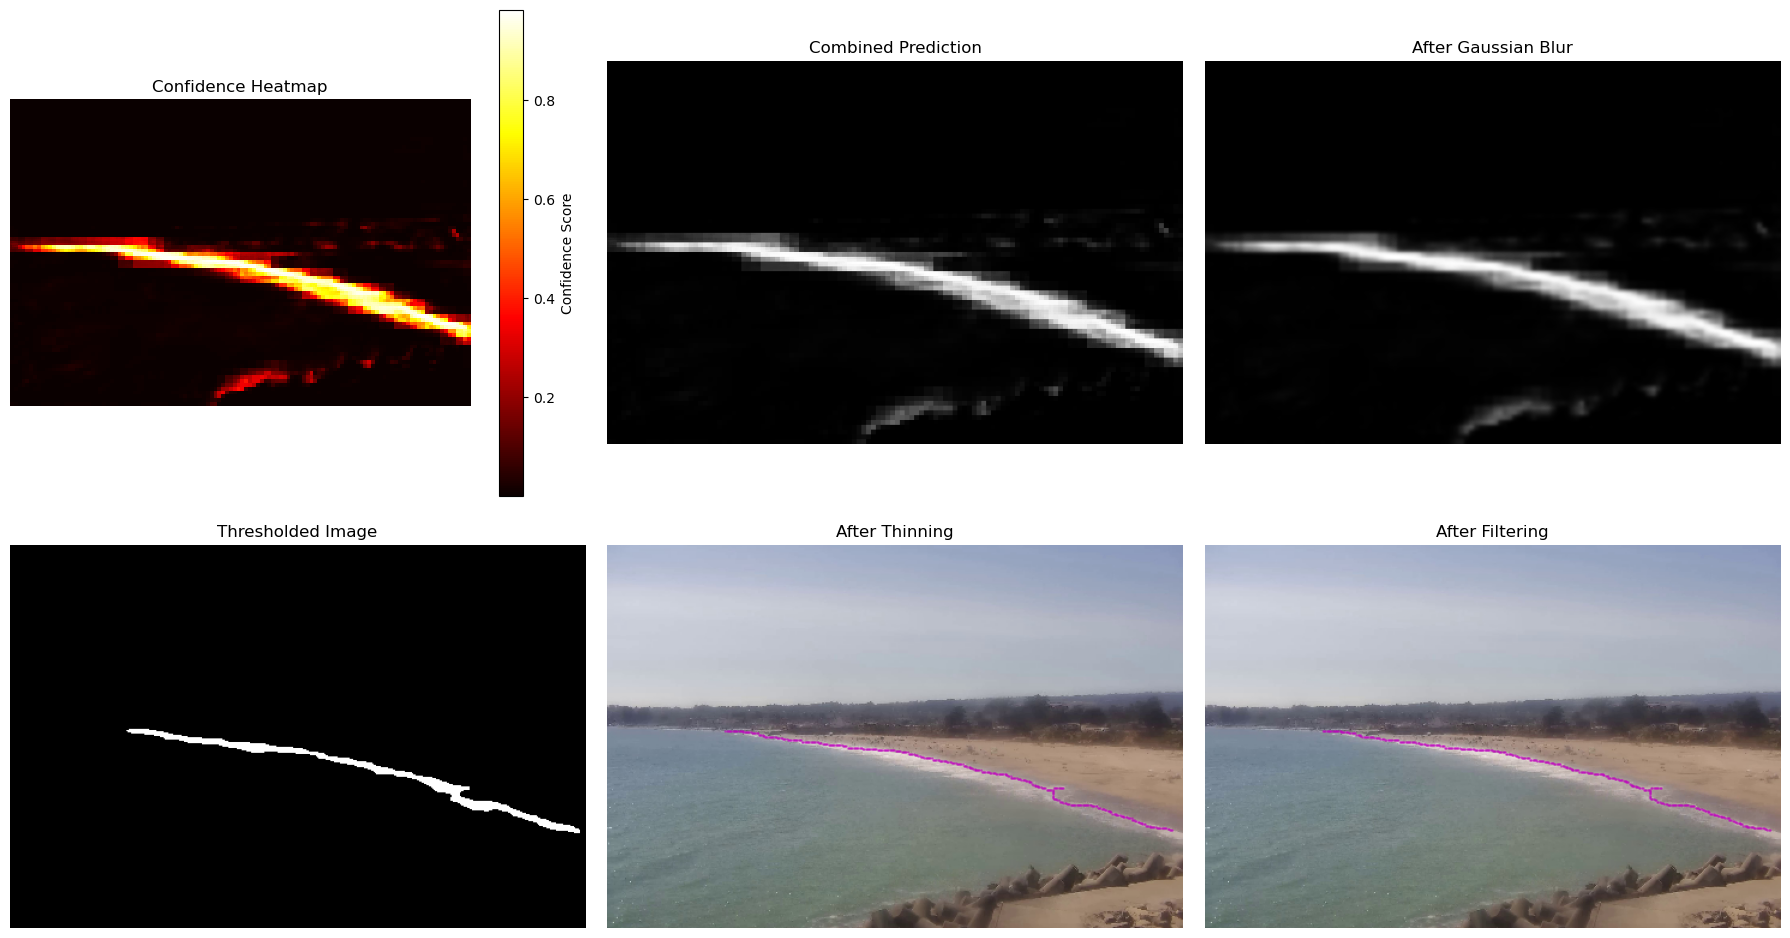

adaptive_thres_value: 0.9075430154800415


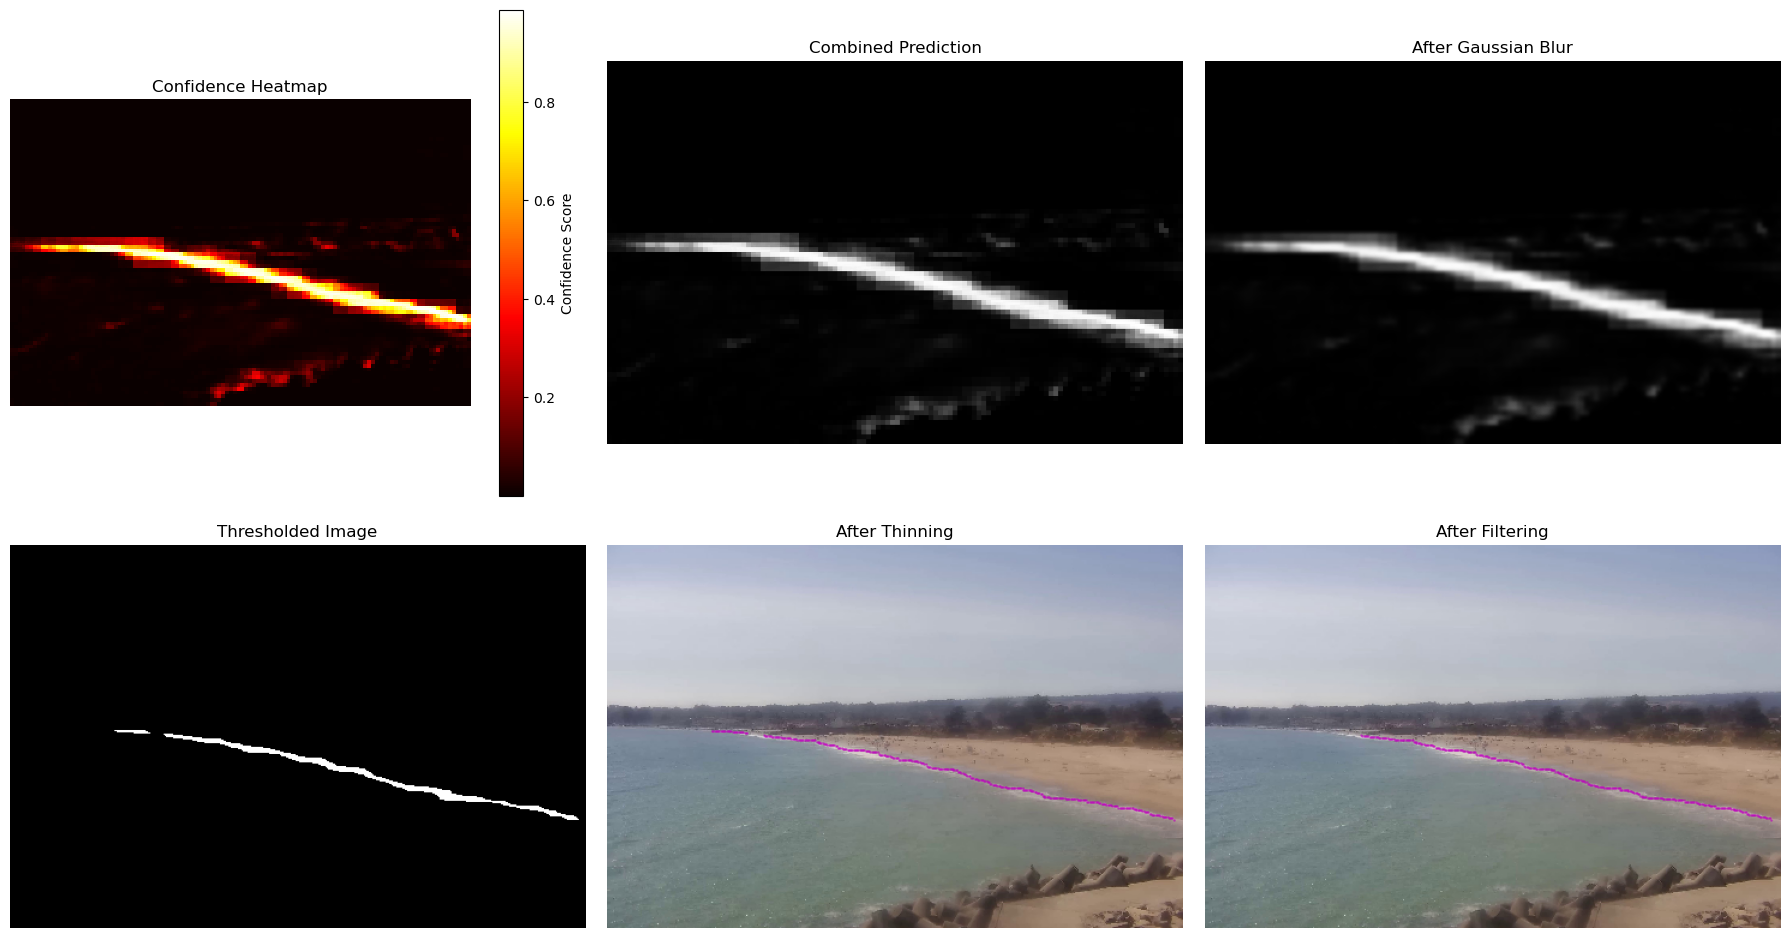

adaptive_thres_value: 0.8884114146232605


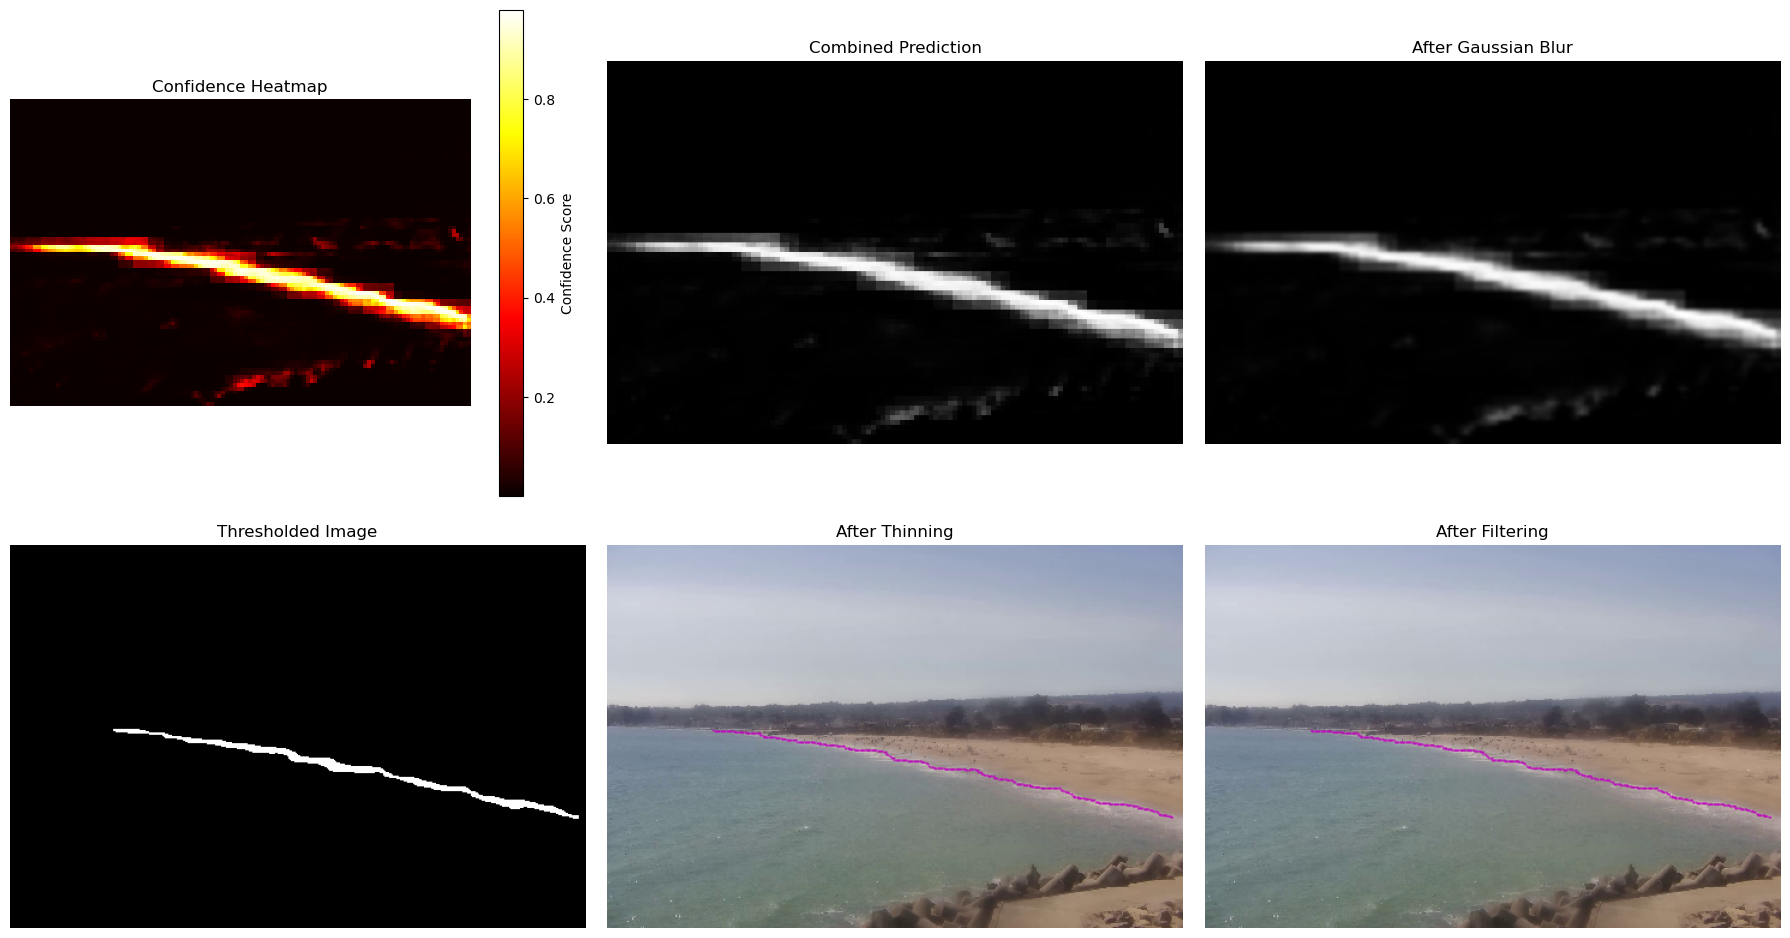

adaptive_thres_value: 0.9004144906997681


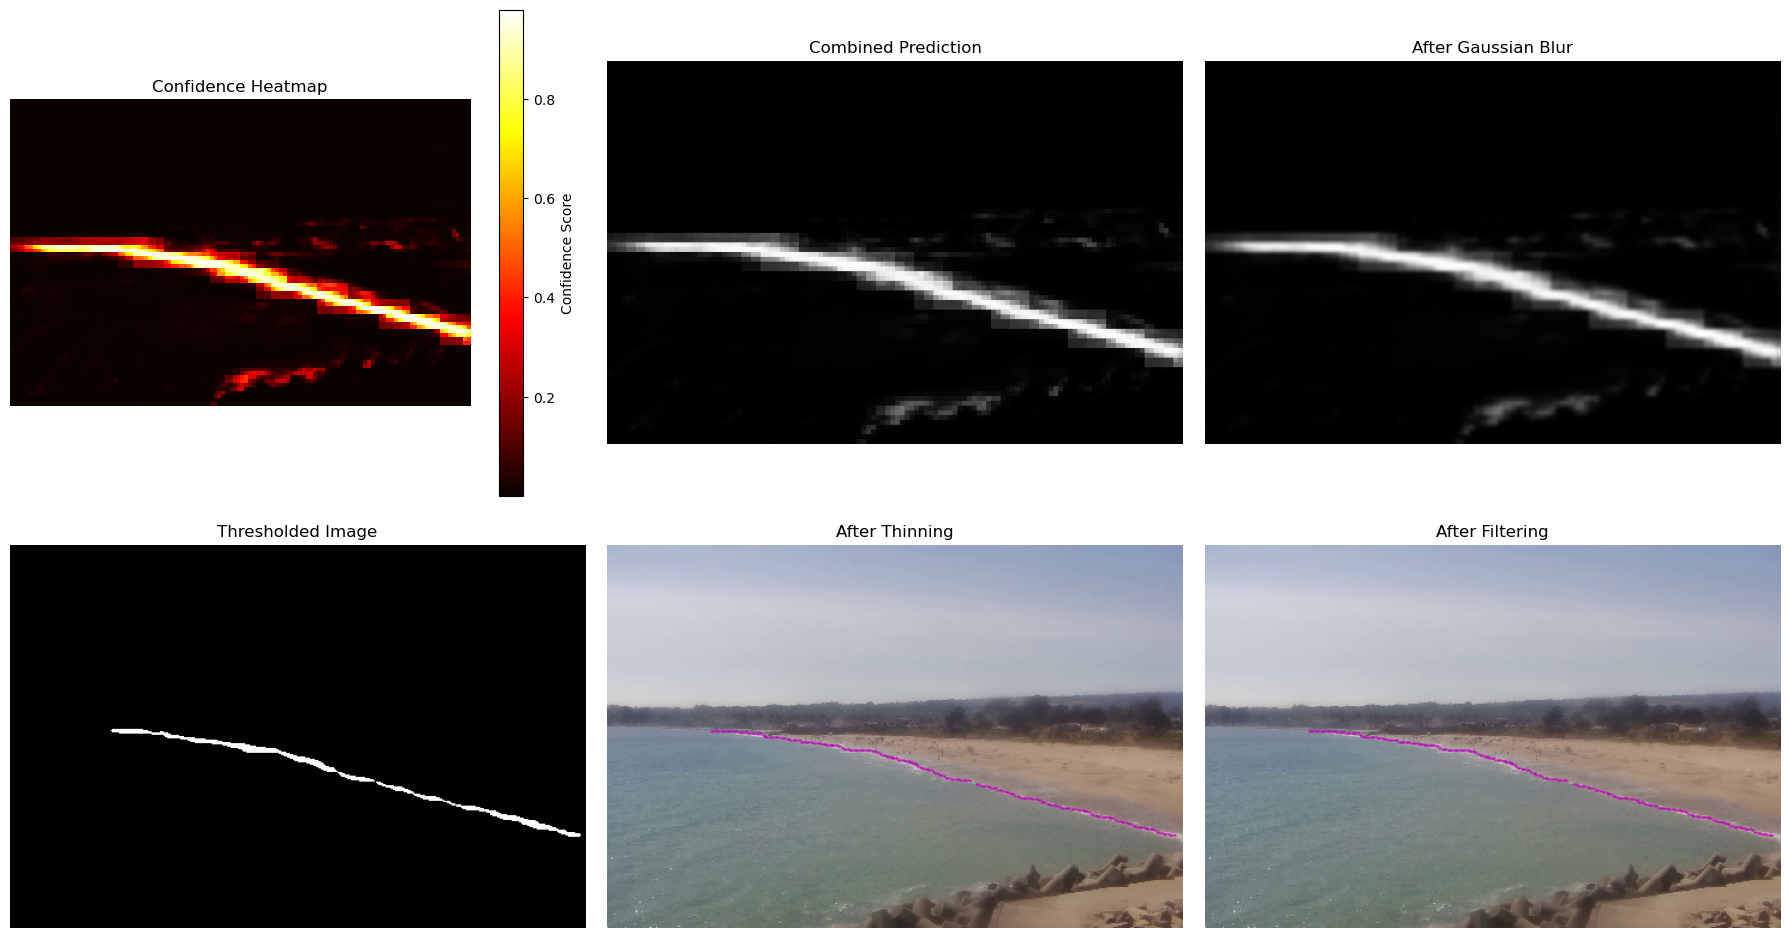

adaptive_thres_value: 0.8998586535453796


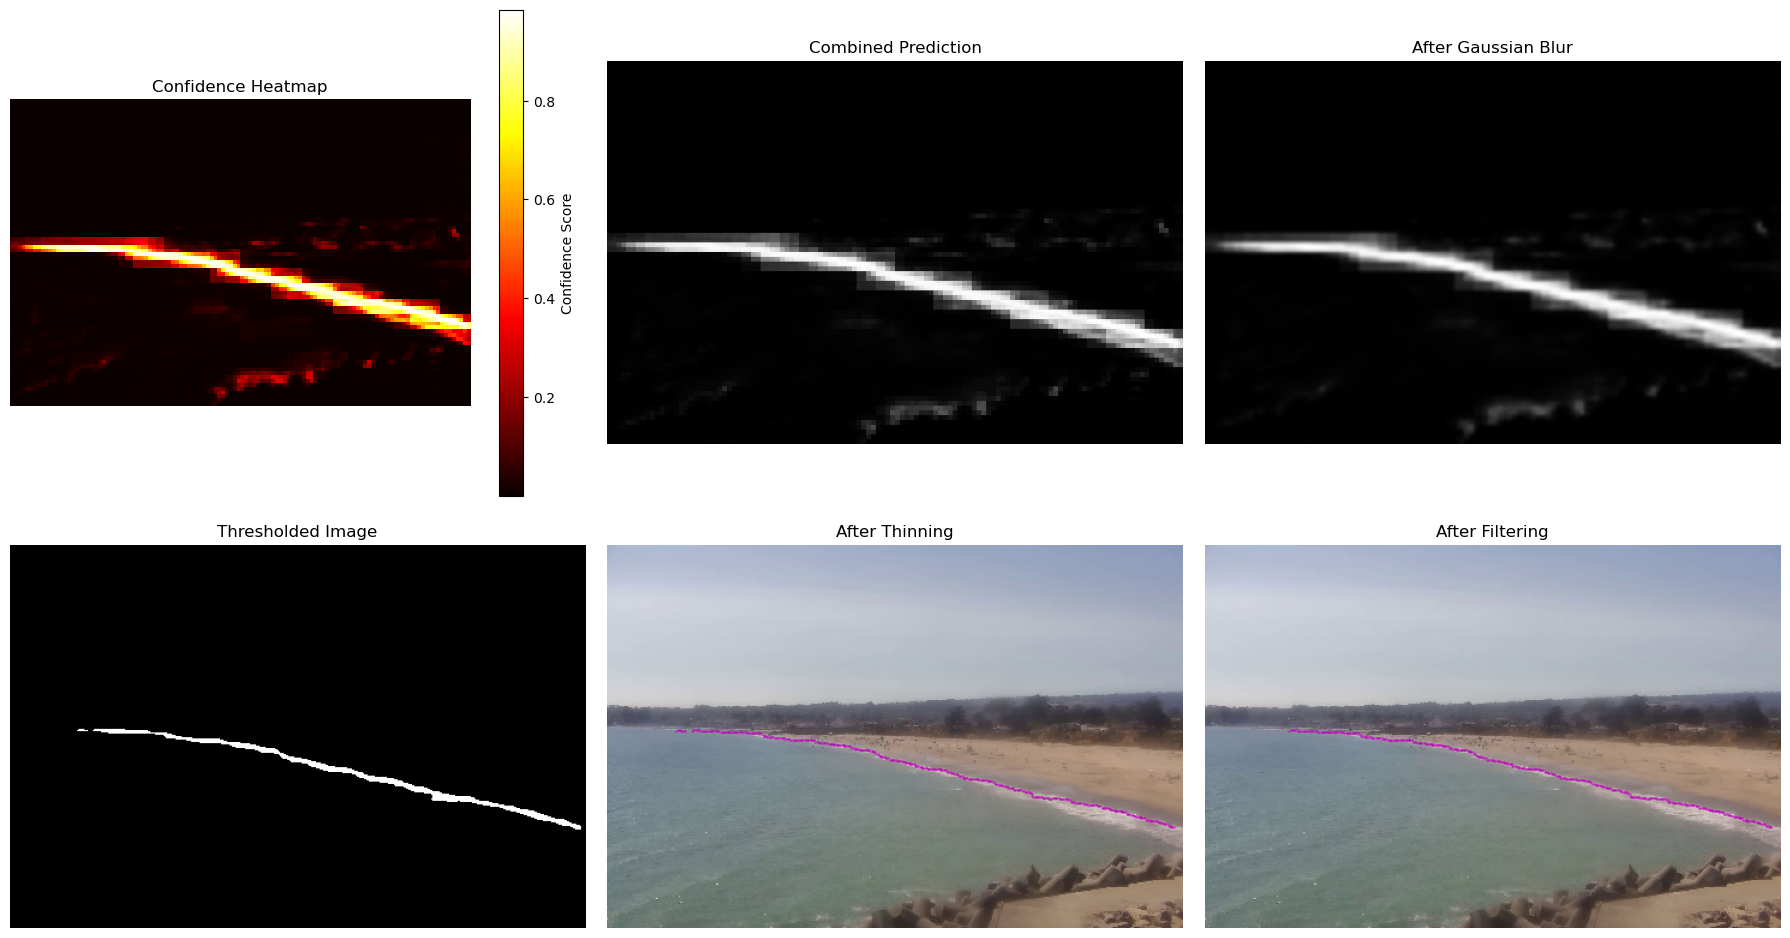

adaptive_thres_value: 0.8890026807785034


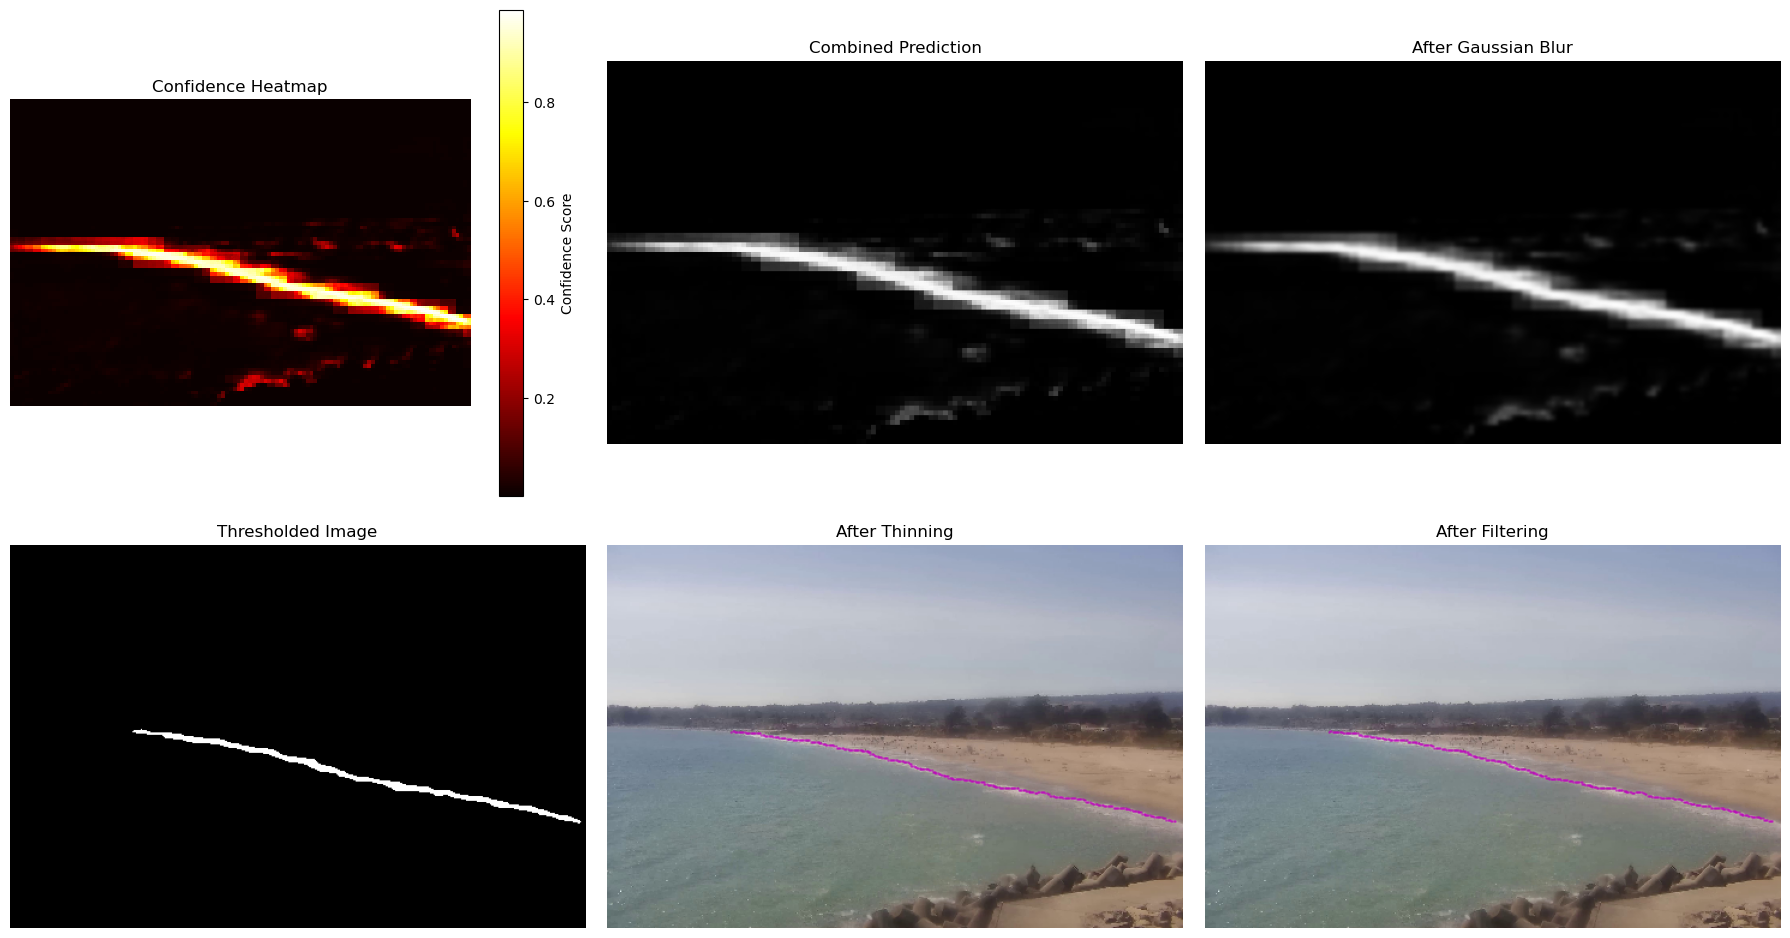

adaptive_thres_value: 0.9169641852378845


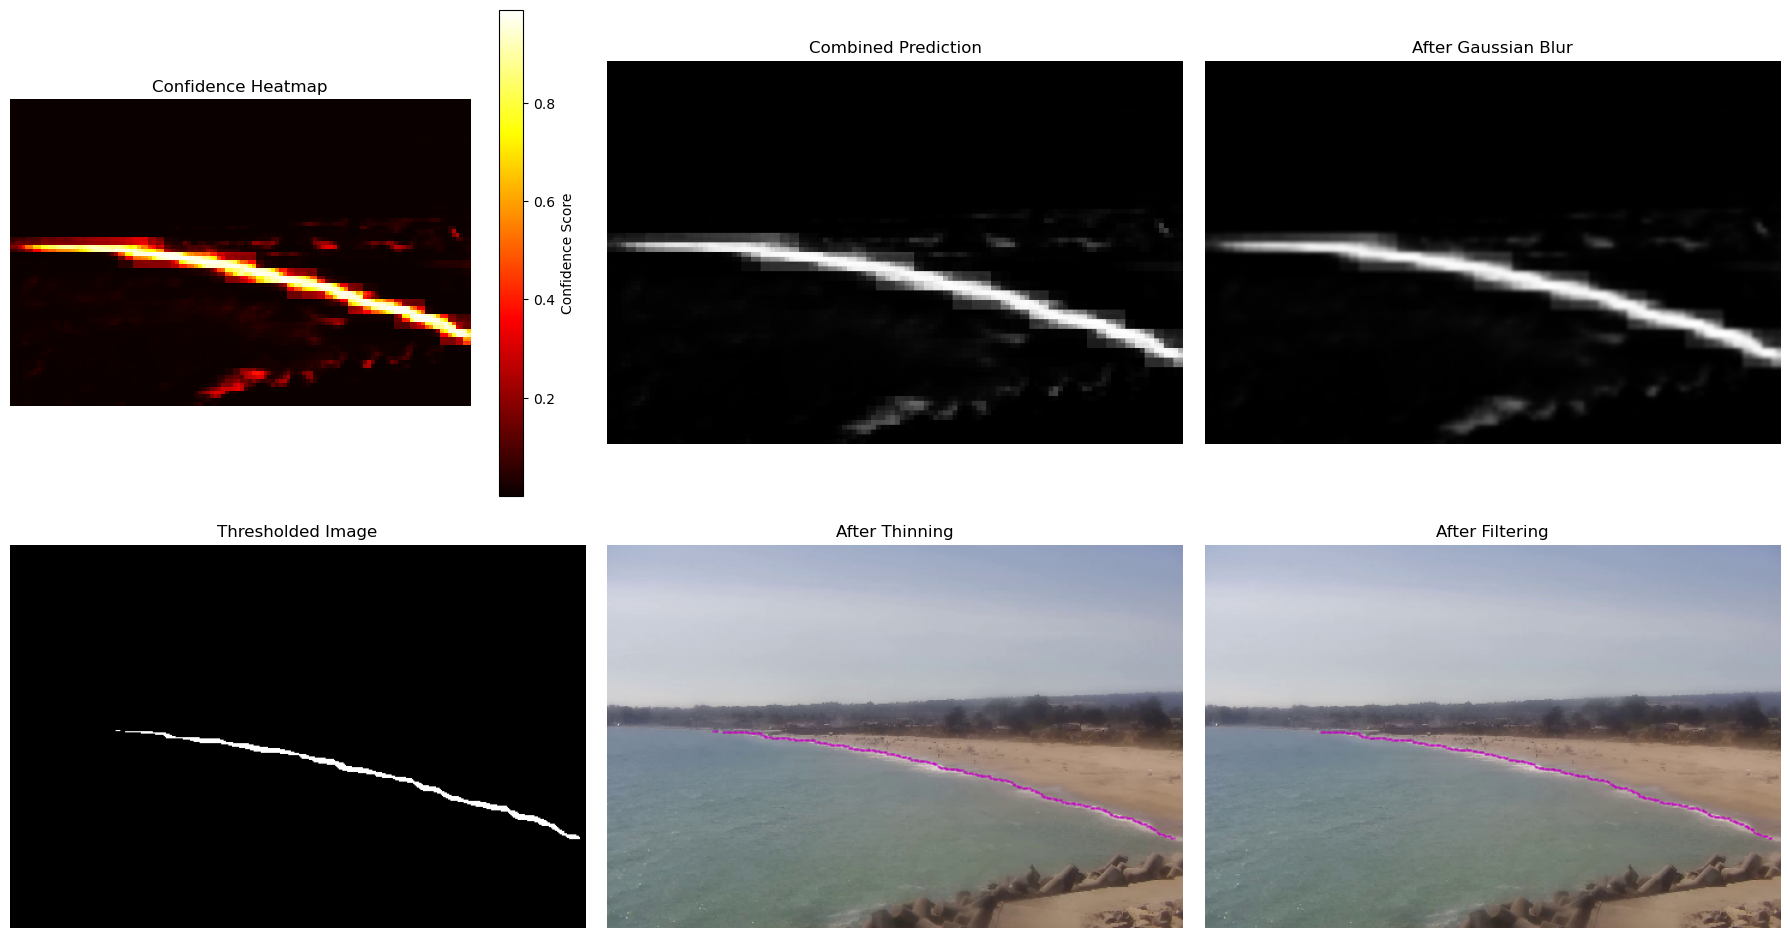

adaptive_thres_value: 0.9150081038475036


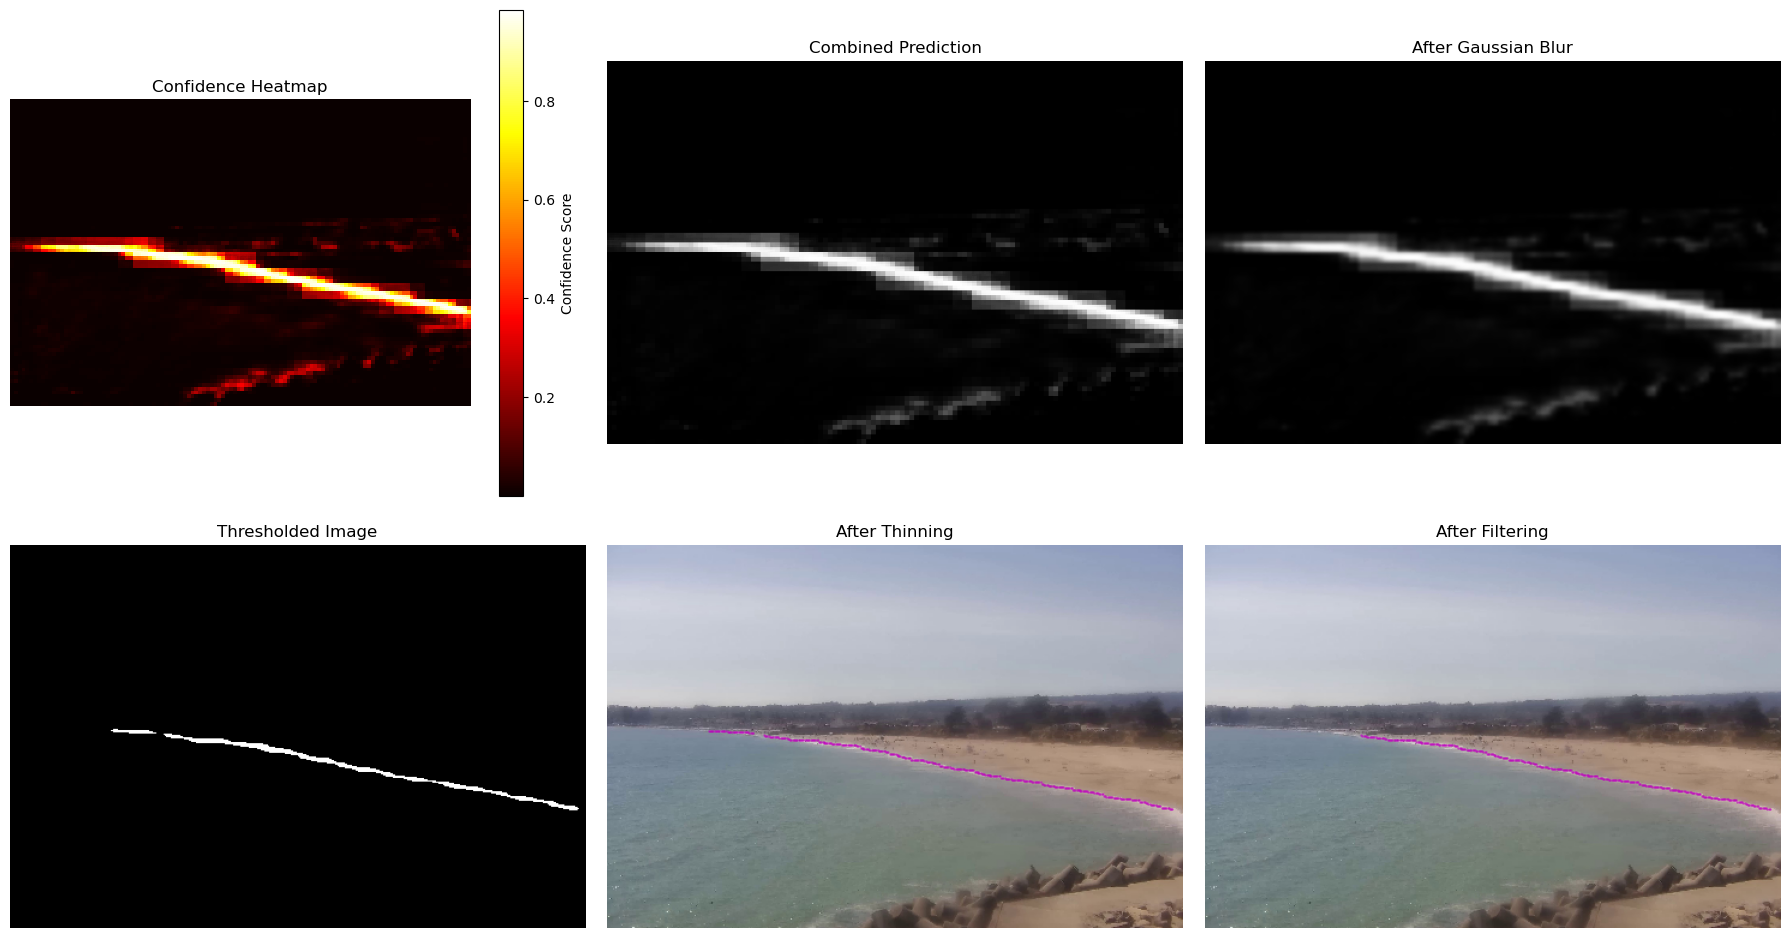

adaptive_thres_value: 0.8887928485870361


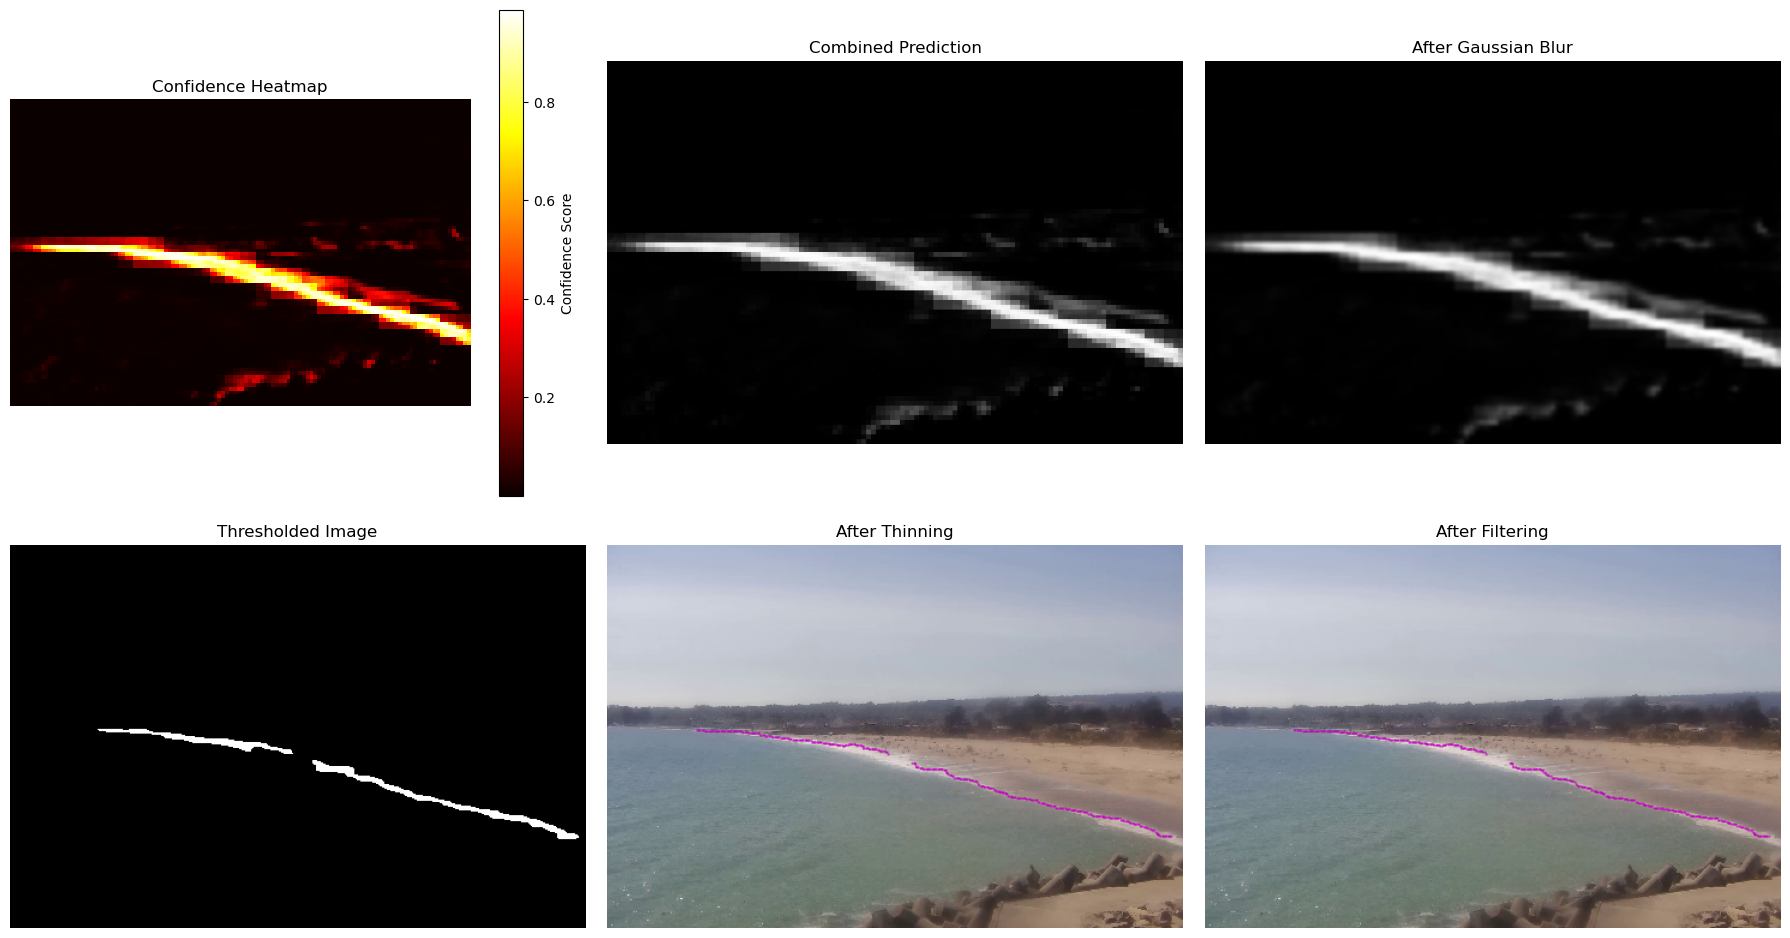

adaptive_thres_value: 0.8931934237480164


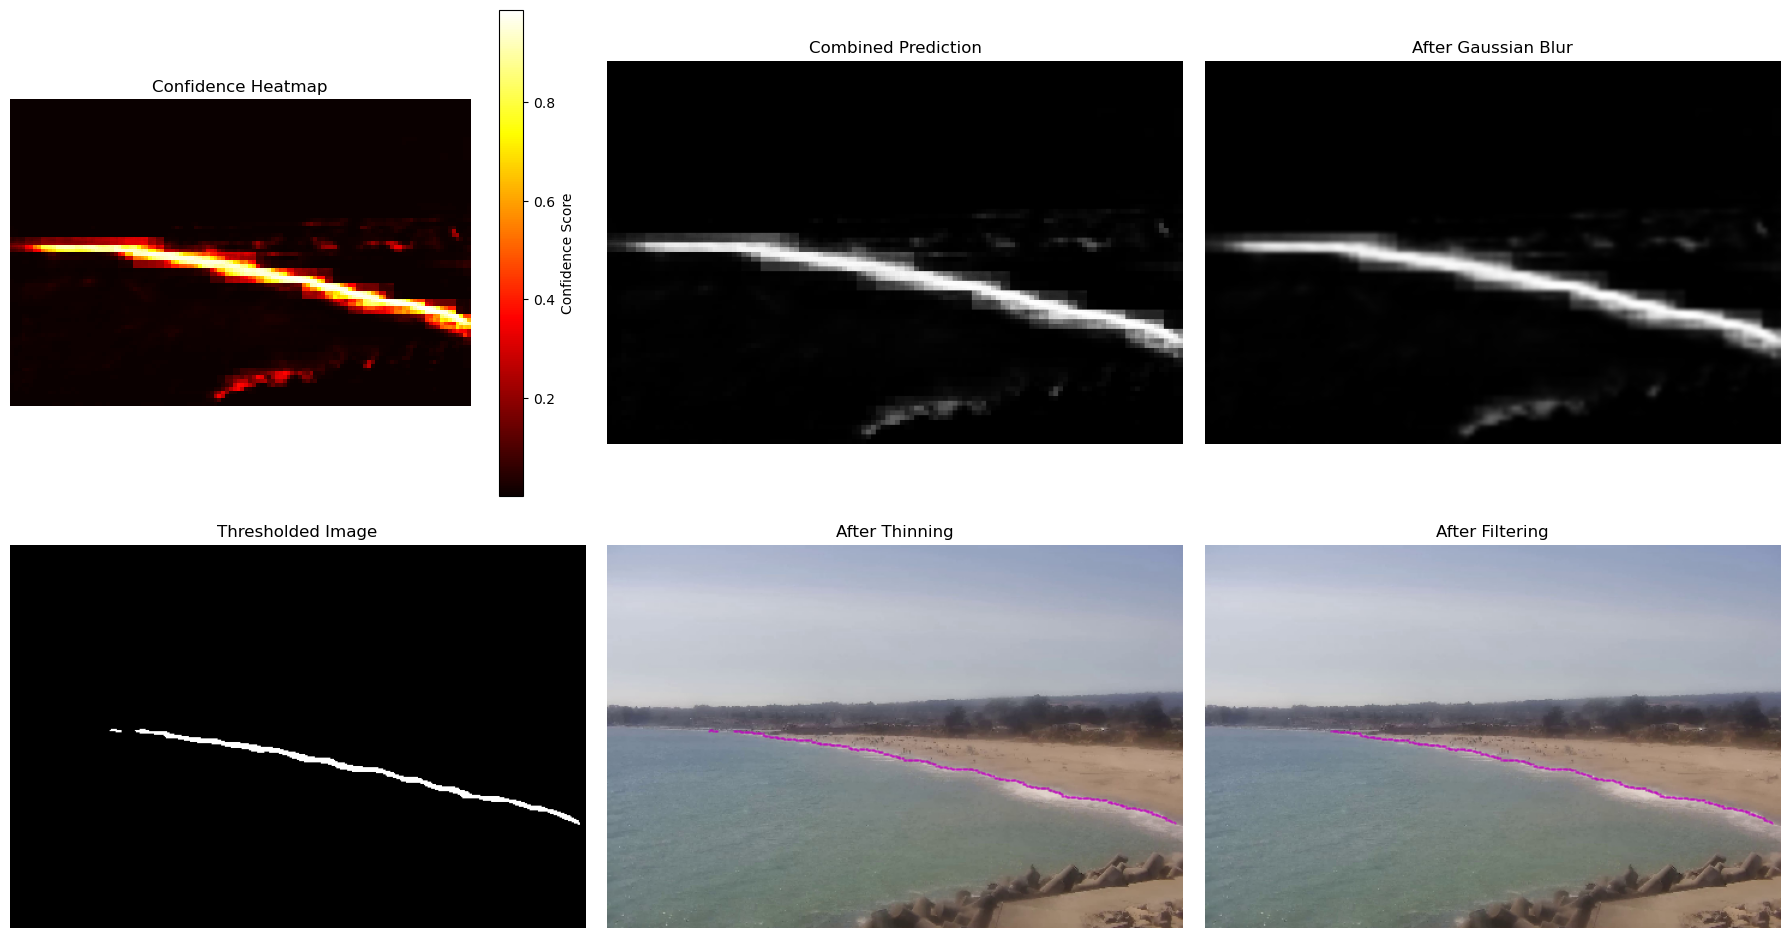

adaptive_thres_value: 0.8845385909080505


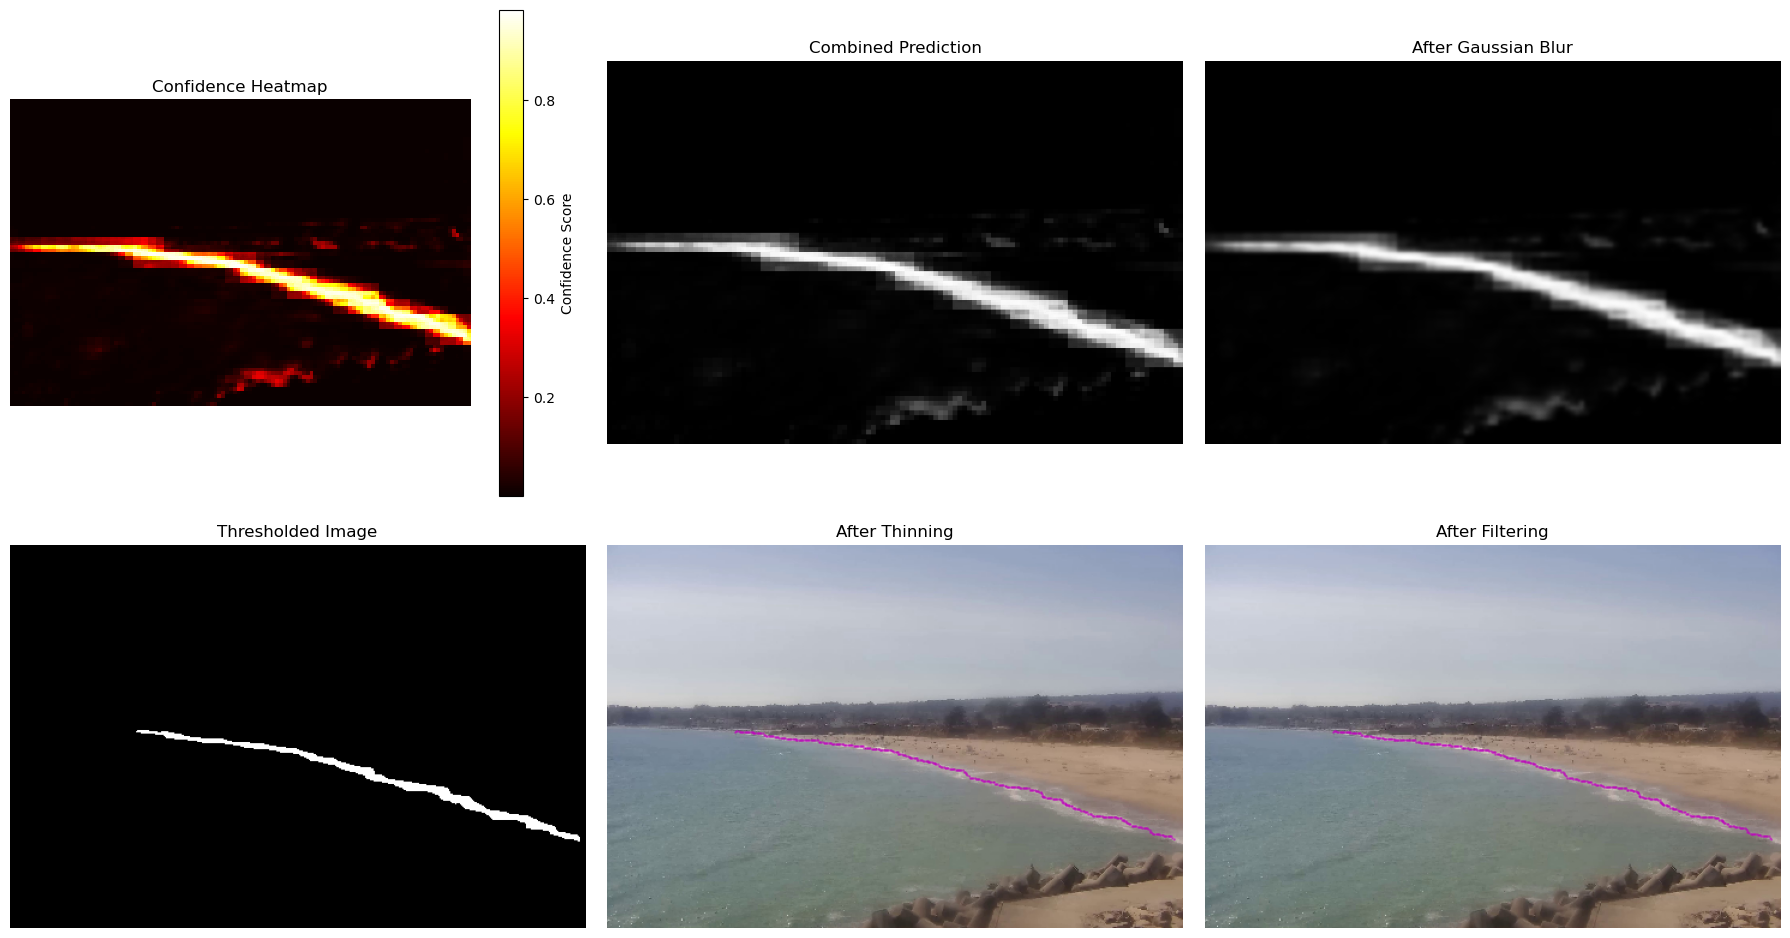

adaptive_thres_value: 0.8932750463485717


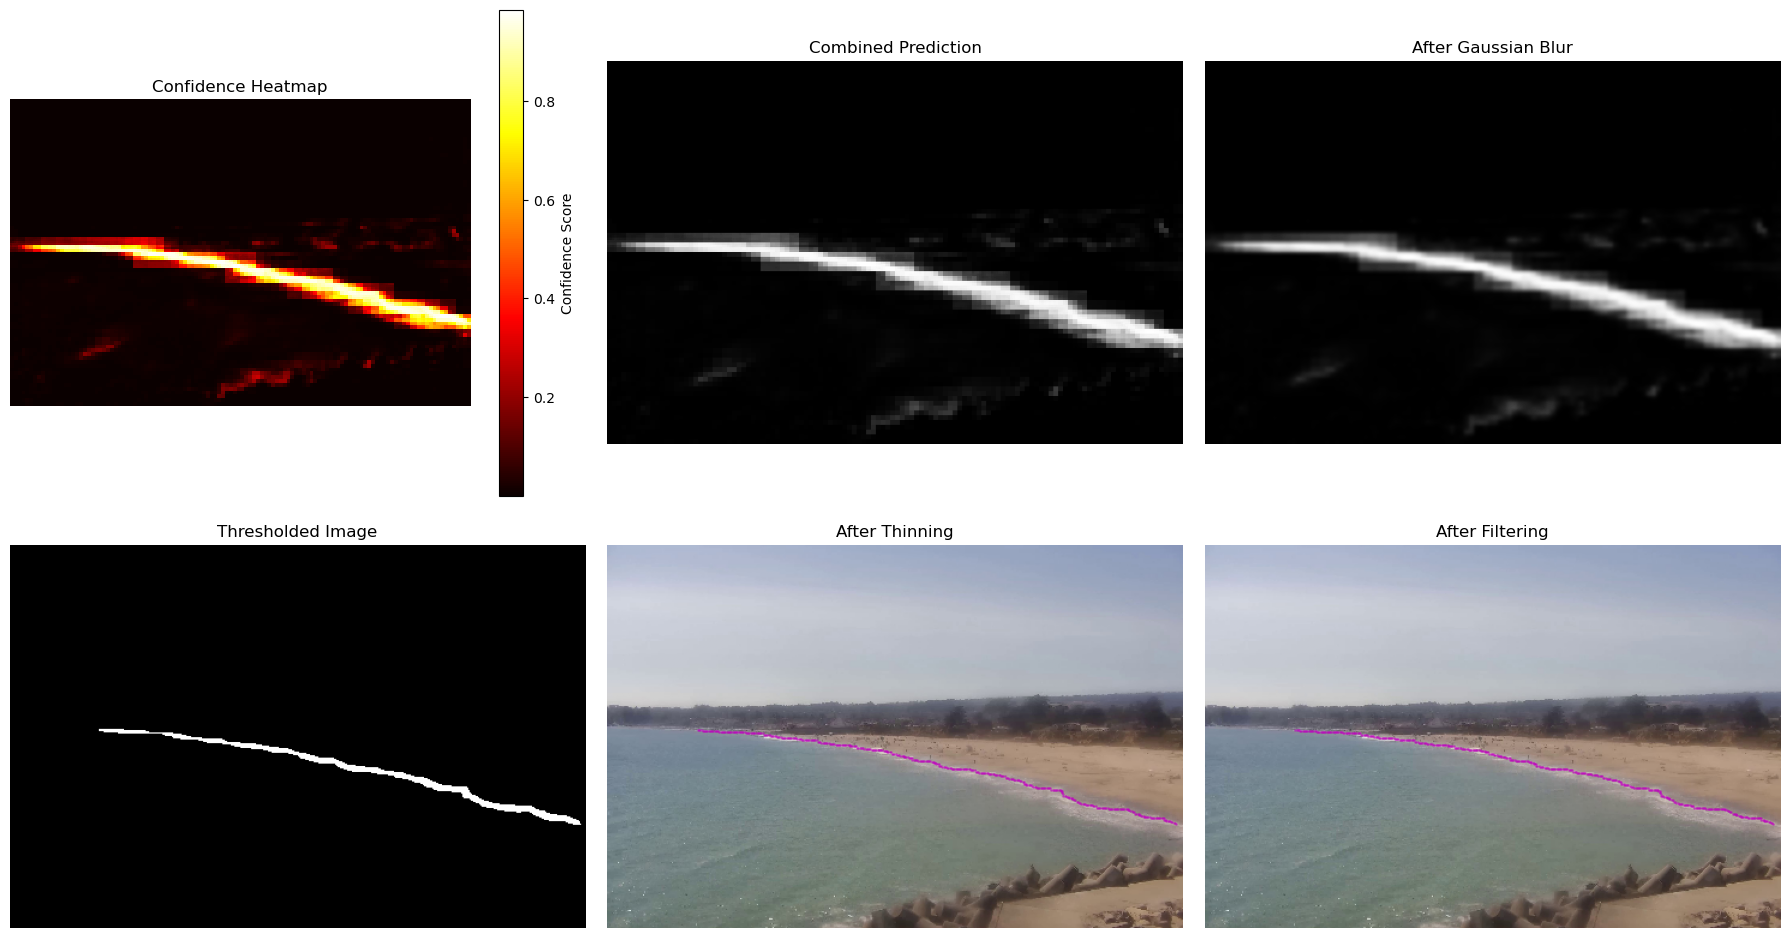

adaptive_thres_value: 0.9001327276229858


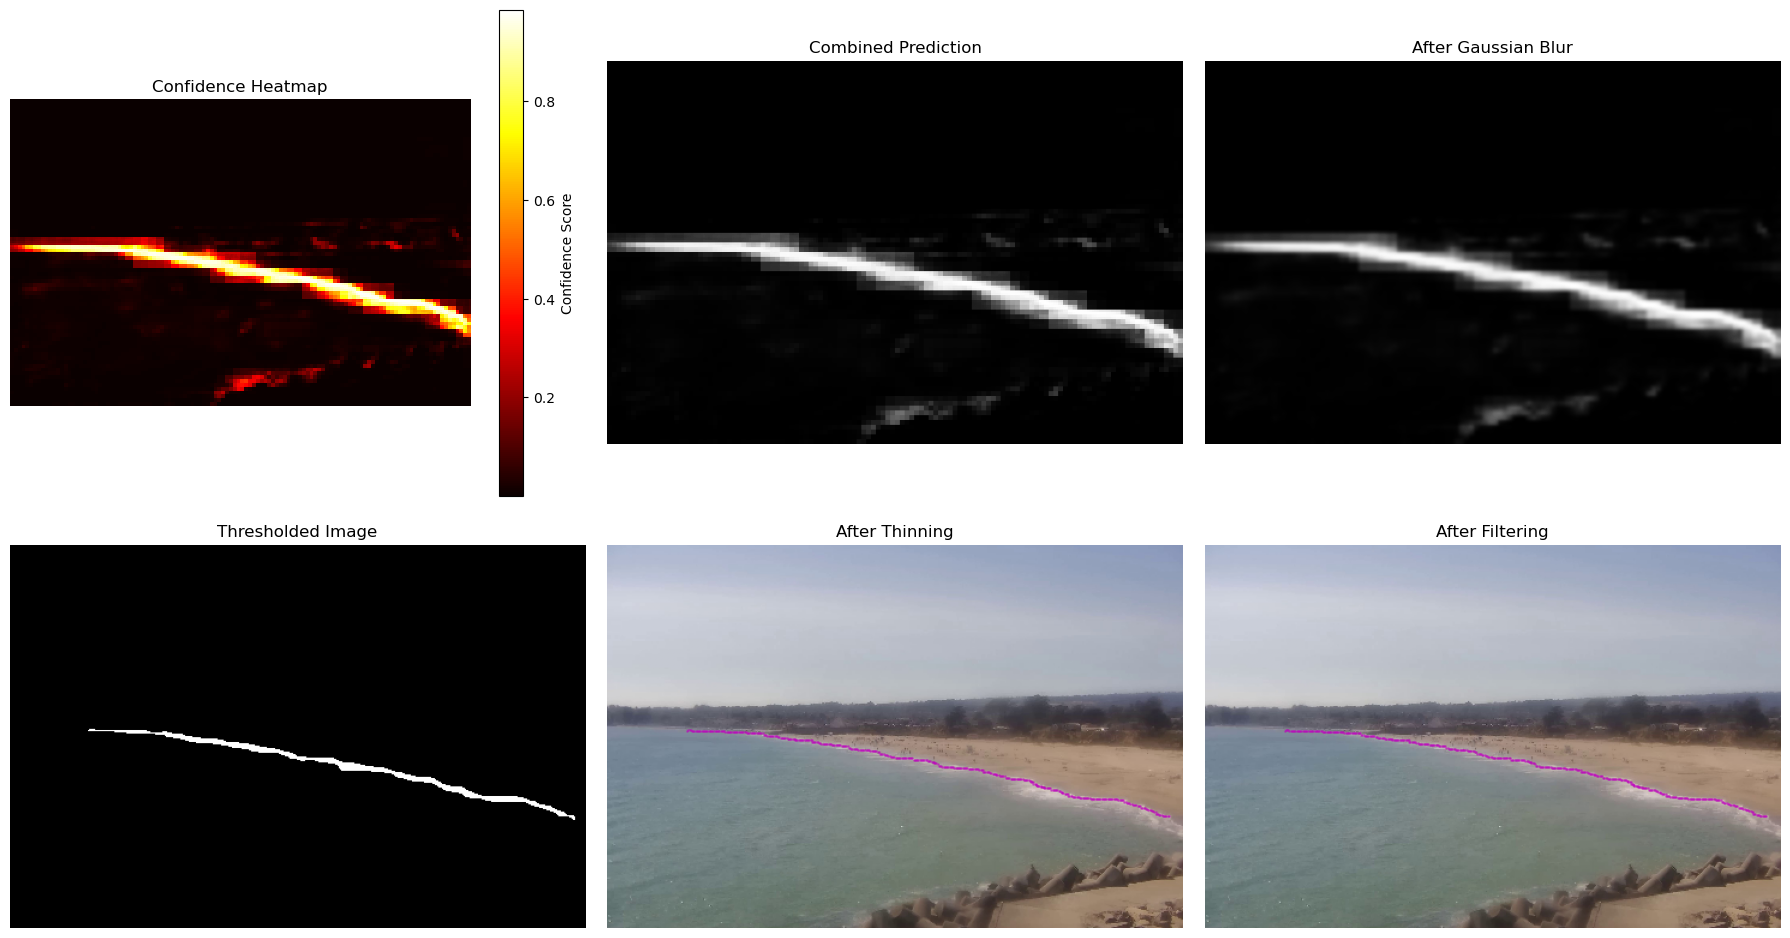

adaptive_thres_value: 0.8831433653831482


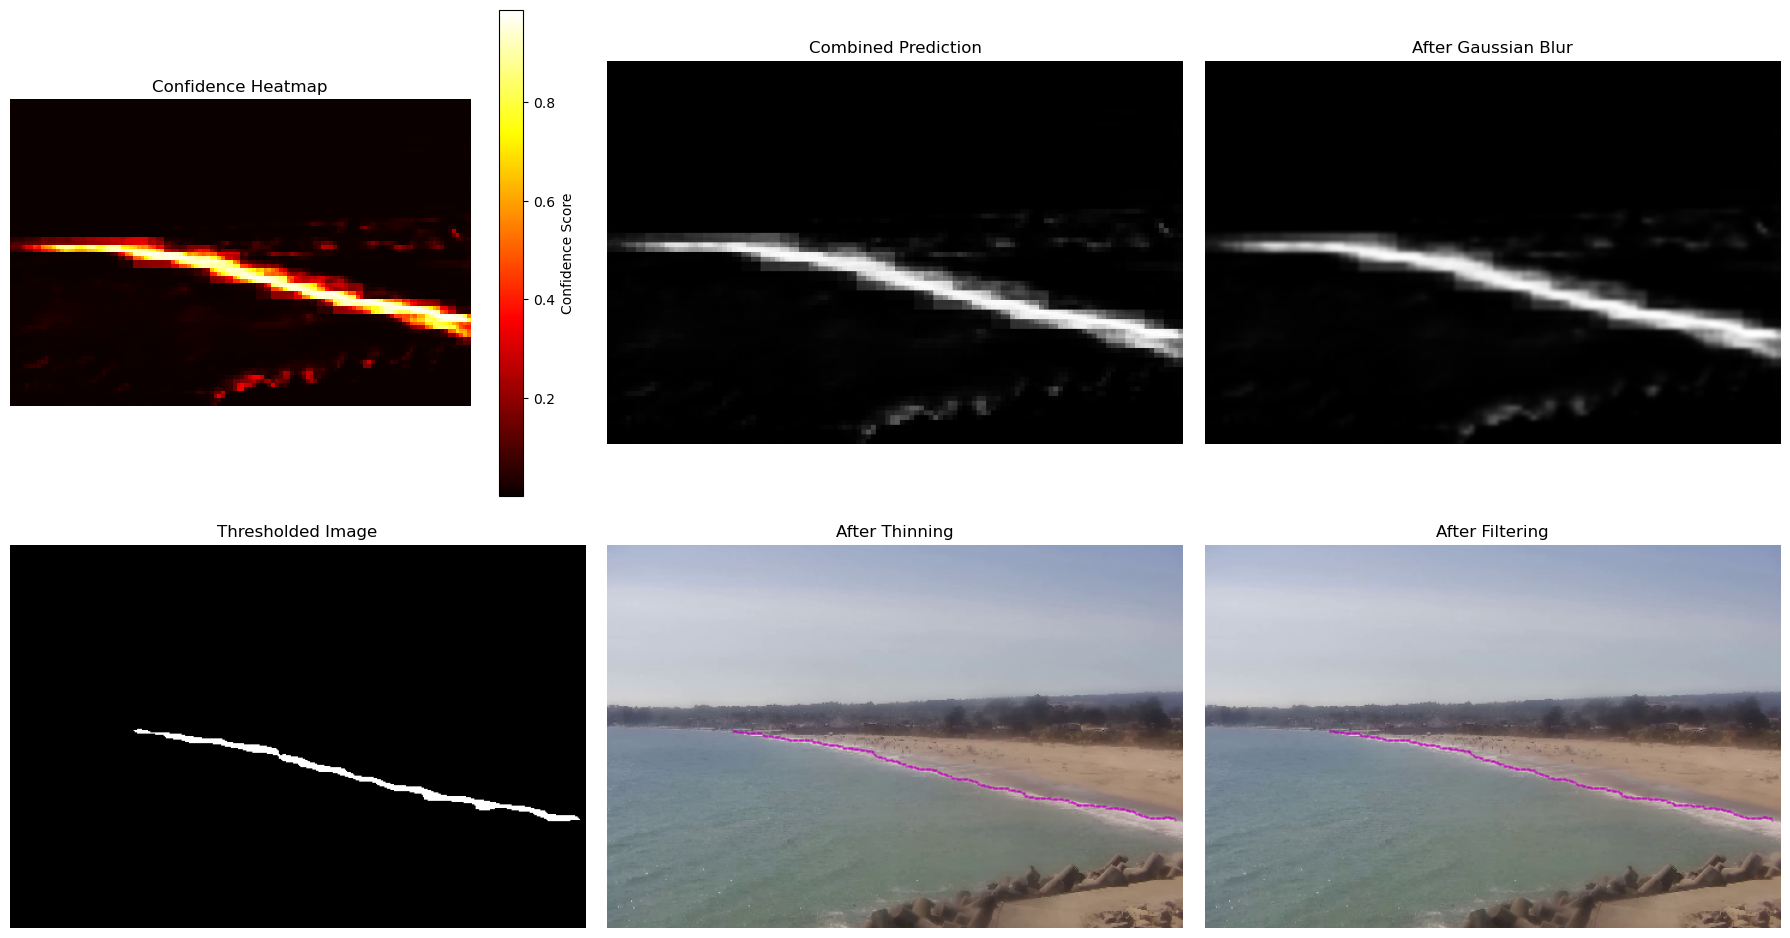

In [6]:
counter = 0
for image_file in imgPaths:
    #print(image_file)
    # Read the image
    frame = cv2.imread(image_file)

    if frame is not None:
        # Your existing image processing code
        imgData_single = load_single_image(frame, imSize)
        if imgData_single.max() > 1:
            imgData_single = imgData_single / 255
        imgData_single = torch.from_numpy(imgData_single.transpose((2, 0, 1))).float().unsqueeze(0)
        model_pred_single = hed_predict_single(hedModel, imgData_single)
        if torch.sum(model_pred_single) > 0:
            #print("detection found", torch.sum(model_pred_single))
            plot_single_prediction(imgData_single, model_pred_single, thres=0.6, cvClean=True, imReturn=False)
            counter += 1
            
    if counter == 15:
        break